<a href="https://colab.research.google.com/github/avigangarde/Capstone-II--Yes-bank-stock-close-price-prediction-Supervised-ML-Regression-/blob/main/Capstone_II_Yes_bank_stock_close_price_prediction(Supervised_ML_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## **Project Name**    - **Capstone II- Yes bank stock close price prediction(Supervised ML-Regression)** ##


##### **Project Type**    - Supervised ML-Regression
##### **Contribution**    - Individual
##### **Project by -** Avinash B Gangarde (Data science trainee at Almabetter)

# **Project Summary -**

This project is based Yes bank stock close price prediction .The objective of project is to predict the stock close price of Yes bank from the given data . Data given is from the period of July-2005 to Nov- 2020. Price of the stock has been inflated due to news and misconduct in the organisation. So we have predict  the stock price based on the given data.

 Yes bank is very well known in the Indian banking sector and has considerable amount of customers . Since 2018 , it has been in the news due to the fraud case involving the Rana Kapoor , who was a banker and managing director and CEO of  Yes bank. Owing to this fact , it was interesting to know how this impacted the company stock price and whether time series model or any other model can do justice to such situation. This dataset has the stock price since its inception and also including the closing , starting , highest and lowest stock price of every month. The main objective is to predict the closing  stock price of every month.


   In order to perform this task of predicting the closing stock price we are applying the linear regression model and try to see where it able to predict the closing stock price . Firstly we have to do the EDA of the dataset and clean the dataset and remove the null values and outliers. Then after that we have to do feature encoding if needed on the dataset. After the feature encoding we try to fit our  model on training and testing dataset and see the measuring parameters after that we will do hyper parameter tunning and trying to find out best fit hyper parameter and also cross validation. Then after that we will do regulerization  to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting. Using Regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it.


   In lastly we will do model explainability. Explainability in machine learning means that you can explain what happens in your model from input to output. Last and most important part is conclusion in which we conclude the learning and outcomes of the project and the model .


**GitHub Link -**[avigangarde/capstone II -Yes bank stock close price prediction (supervised ML - Regression)](https://github.com/avigangarde/Capstone-II--Yes-bank-stock-close-price-prediction-Supervised-ML-Regression-/blob/main/Capstone_II_Yes_bank_stock_close_price_prediction(Supervised_ML_Regression).ipynb)

# **Problem Statement**


Due to news and involvement of Rana kapoor in the fraud case , stock price has inflated so much we have the predict the stock price and check whether the ML model able predict the stock. Main  objective is to predict closing stock price of the month.

#### **Define Your Business Objective?**

Yes bank is private bank and it has many stake holders , so its matter that the stocks they own and price of their stocks . It’s very necessary to them to know the stock they own and price of the stock. So they could make decisions about the selling  or keeping then stock and know how much the business is get affected by the inflation of  the stock price.

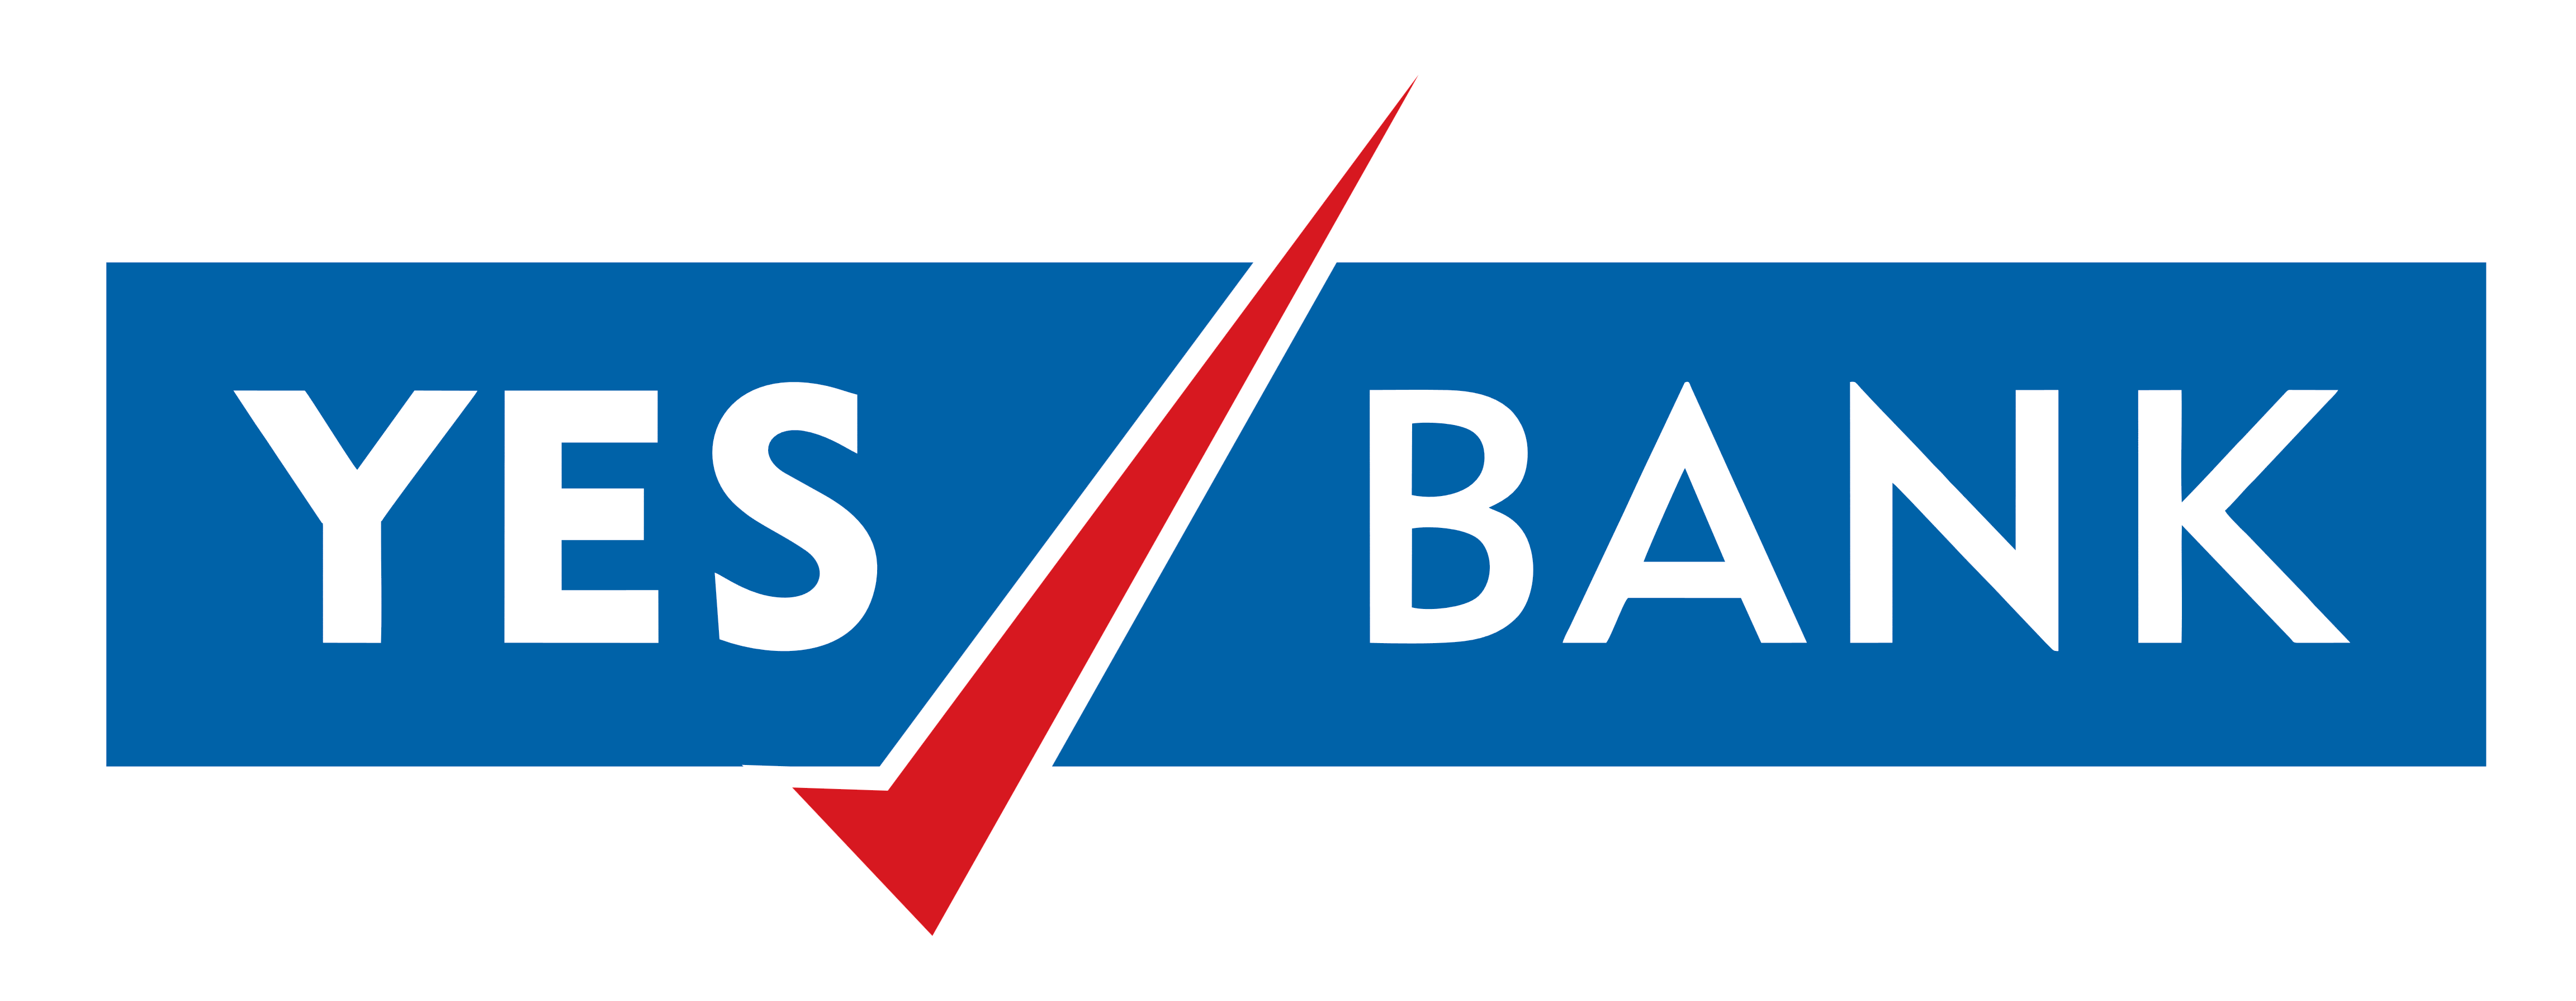

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# import library for data wrangling and data visualization
import pandas as pd
import numpy as np
from numpy import math
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Machine learning libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model  import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error , mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# mount drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading of the dataset
df=pd.read_csv('/content/drive/MyDrive/ML capstone-II csv Files /data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [ ]:
#  Check the number of Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
#  check the duplicates values present in the Dataset (Duplicate Value Count)
df.value_counts()

Date    Open    High    Low     Close 
Apr-06  20.56   20.80   18.02   19.49     1
May-11  61.26   61.68   54.50   60.07     1
Mar-17  290.60  311.57  283.60  309.82    1
Mar-18  320.70  325.80  285.10  304.90    1
Mar-19  234.60  281.30  228.80  275.05    1
                                         ..
Jan-09  15.28   18.34   11.48   12.24     1
Jan-10  53.60   57.58   46.42   49.84     1
Jan-11  62.98   63.54   49.39   52.59     1
Jan-12  47.92   66.50   46.11   65.99     1
Sep-20  14.30   15.34   12.75   13.15     1
Length: 185, dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

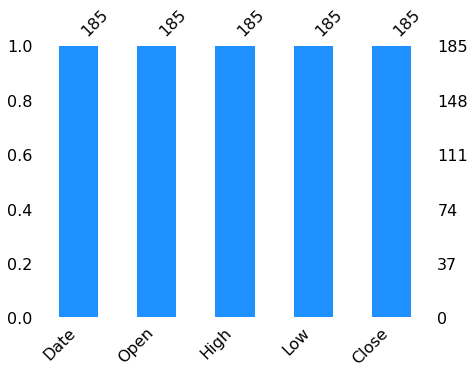

In [ ]:
# Visualizing the missing values present in the dataset.
import missingno as msno
msno.bar(df,figsize=(7,5),color='dodgerblue')

In [ ]:
# check the minimum values present in the dataset
df.min()

Date     Apr-06
Open       10.0
High      11.24
Low        5.55
Close      9.98
dtype: object

In [ ]:
# check the maximum values present in the dataset
df.max()

Date     Sep-20
Open     369.95
High      404.0
Low       345.5
Close     367.9
dtype: object

### What did you know about your dataset?

1] Dataset has 5 columns and 185 rows

2] Dataset has no null values 

3] Data set has include higest stock price of 404.0 Rs

4] Dataset has the lowest stock price of 5.0 Rs

## ***2. Understanding Your Variables***

In [ ]:
# Check the columns present in the dataset.
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# check the statistical values of the given dataset. 
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

* **Date:** It denotes date of investment done (in our case we have month and year).
* **Open:** Open means the price at which a stock started trading when the opening bell rang.
* **High:**  High refer to the maximum prices in a given time period.
* **Low:**  Low refer to the minimum prices in a given time period.
* **Close:** Close refers to the price of an individual stock when the stock exchange closed for the day.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# check the datatype of colunmns 
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

Here we can see that date is a object type of data , so we have to convert the date  columns into datetime format. 

In [ ]:
# import datetime format
from datetime  import datetime
# here the data is of month-year format we have make it pertipuler formate of including the date of start of month to end of month
df['Date']=df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y'))

In [ ]:
# Check the data colums and first rows 
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
# Check the datatype of columns and null values present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


### What all manipulations have you done and insights you found?

Since data has no null values and missing values , there is not much to do with data , so have seen that the date columns has the object type of data ,so we have make sure every columns has perticuler type of dataset .

So we have changed the datatype of colums date to datetime format.

Insights found that :

1] Data has no missig values. 

2] Data has no null values.

3] One columns had the object type of datatype , that we coverted to datetime format.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# Plot the candlestick chart  for the give stock market data.
from plotly.subplots import make_subplots
import plotly.graph_objects as go
hist=df.copy()
fig1 = make_subplots(specs=[[{"secondary_y": True}]])
fig1.add_trace(go.Candlestick(x=hist.index,
                              open=hist['Open'],
                              high=hist['High'],
                              low=hist['Low'],
                              close=hist['Close'],
                              name='Price'))
fig1.update_yaxes(range=[0,700000000],secondary_y=True)
fig1.update_yaxes(visible=False, secondary_y=True)
fig1.update_layout(xaxis_rangeslider_visible=False)  #hide range slider
fig1.update_layout(title={'text':'Stock Price of Yes bank from the Jul-2005 to Nov-2020', 'x':0.5})
fig1.show()




In [ ]:
# ploting the candle stick chart for the stock price inflation of Yes bank
import plotly.graph_objects as go
import pandas as pd
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_layout(title={'text':'Stock Price of Yes bank from the Jul-2005 to Nov-2020', 'x':0.5})
fig.show()

In [ ]:
# Check the data shown in the graph.
df.iloc[40]

Date     2008-11-01 00:00:00
Open                   14.79
High                    17.8
Low                    11.25
Close                  12.26
Name: 40, dtype: object

In [ ]:
# Check the data shown in the graph.
df.iloc[97]

Date     2013-08-01 00:00:00
Open                    66.0
High                   67.81
Low                    43.22
Close                  48.65
Name: 97, dtype: object

In [ ]:
# Check the data shown in the graph.
df.iloc[184]

Date     2020-11-01 00:00:00
Open                   12.41
High                    14.9
Low                    12.21
Close                  14.67
Name: 184, dtype: object

##### 1. Why did you pick the specific chart?

Because,it commonly used to shows the stock price inflation in the stock market  .

##### 2. What is/are the insight(s) found from the chart?

1] Yes bank stock reached the highest closing price in August 2018.

stats :  August 2018

closing price: 343.4

2]  In Nov-2020 stock price  has fall down to lowest. 

stats: Nov 2020

closing price : 14.67

3] Stock price has seen execellent growth in market in the 2005 to 2018 after that suddden fall in share price in market .

4] After news breaking in the market price of share has significantly fall down and has effect on the business 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Above insights shows the postive and negative growth of the Yes bank . definatly the huge money went to losses (Almost 400 cr were sanctioned to lender without norms) that incurred huge losses to Yes bank this reason behind the bank suffering losses. Yes bank might not able to regain there losses and hence fall down in the company losses after the 2018. 

#### Chart - 2

<function matplotlib.pyplot.show(*args, **kw)>

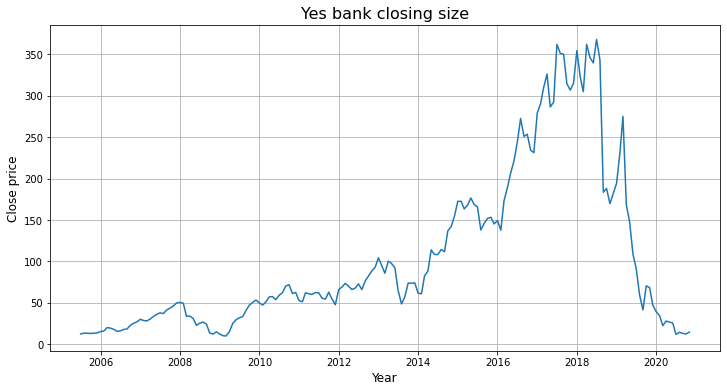

In [ ]:
# Chart - 2 visualization code
# ploting close price vs date
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Close price', fontsize=12)
plt.plot(df['Date'],df['Close'])
plt.title('Yes bank closing size', fontsize=16)
plt.show


##### 1. Why did you pick the specific chart?

Above chart is line chart. we picked this chart to show the performance of the close stock price

##### 2. What is/are the insight(s) found from the chart?

1] After 2018 there is sudden fall in the graph.

2] We can see that stock has reached  close price where it was stared .

3] In 2018 stock price was at its highest value.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This graph shows the positive and negative growth of the Yes bank , upto 2018 the stock has risen continuesly . and there is fall in stock price has affected the business a lot.

#### Chart - 3

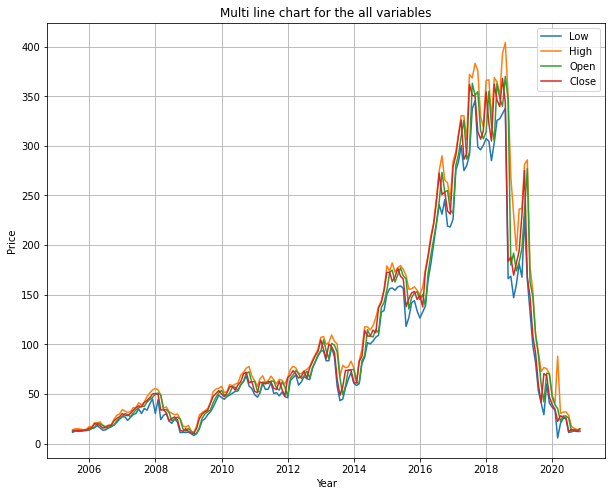

In [ ]:
# Chart - 3 visualization code
#  Multi line chart comparing the all the variable in the data 
plt.figure(figsize=(10,8))
plt.plot(df['Date'],df['Low'])
plt.plot(df['Date'],df['High'])
plt.plot(df['Date'],df['Open'])
plt.plot(df['Date'],df['Close'])
plt.legend(['Low','High','Open','Close'])
plt.title('Multi line chart for the all variables')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

1] To compare the different varibale with the time period 
2] To Show the variation in the value of stock price 

##### 2. What is/are the insight(s) found from the chart?

1] All the features are compare with the dependent feature to know the inflation in the stock price

2] Although there is not much fluctuation and not so much varied in the month to month prices

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1] We do not see much inflation or variation amongs them. Stock has been seen significant growth and downfall in the shwon period.

2] we can has been impacted the significantly in just two years.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
# So in the Given data we have independent variables and depenedent variables
# Stock close price is our dependent variables and rest of the  variables are independent variables .
# to make the list of independent  numerical variables 
numerical_features=list(set(df.describe().columns)-{'Close'})
numerical_features

['Low', 'Open', 'High']

In [ ]:
# All columns containing the numerical values 
df.select_dtypes(include=np.number).columns.tolist()

['Open', 'High', 'Low', 'Close']

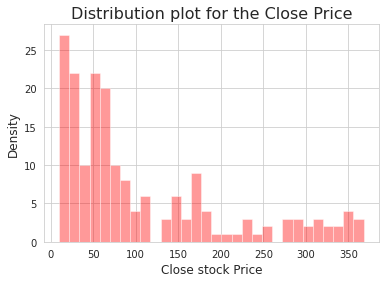

In [ ]:
# To check the distribution 'close price' of the stock 
sns.set_style('whitegrid')
sns.distplot(df['Close'], kde = False, color ='red', bins = 30)
plt.title('Distribution plot for the Close Price', fontsize=16)
plt.xlabel('Close stock Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

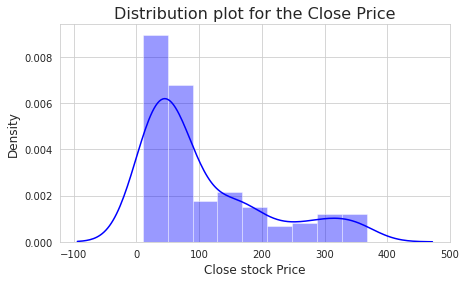

In [ ]:
# plot the distribution of the close price of the stock
plt.figure(figsize=(7,4))
sns.distplot(df['Close'],color='blue')
plt.title('Distribution plot for the Close Price', fontsize=16)
plt.xlabel('Close stock Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

1] To show the distribution of the graph . 

##### 2. What is/are the insight(s) found from the chart?

1] We found that the distribution of the stock close price is right skewed.

2] We have to make sure that it should be normally distributed to fit our model well .

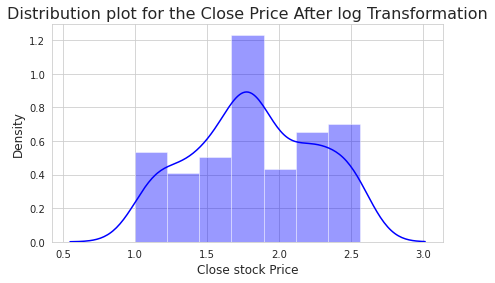

In [ ]:
#  Apply the log normal distribution to make the the graph normal distribution.
plt.figure(figsize=(7,4))
sns.distplot(np.log10(df['Close']),color='Blue')
plt.title('Distribution plot for the Close Price After log Transformation', fontsize=16)
plt.xlabel('Close stock Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

#### 1] This is the distribution plot after applying the log distribution.

##**Lets see the distribution of value in the other features and plot the distribution of the feature and apply the lognormal distribution of needed .**

<function matplotlib.pyplot.show(*args, **kw)>

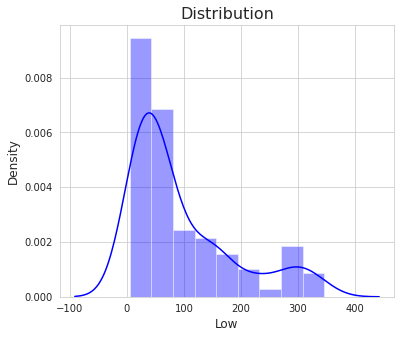

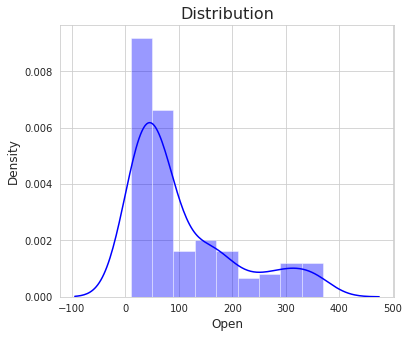

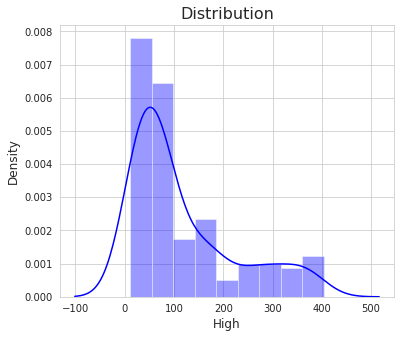

In [ ]:
# Lets plot the distribution for the each variables.
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot((df[col]), color='blue')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

##### 1.why do you pic specific  chart?


To know the distribution of the data points in the feature we plot the distribution graph.

#####2. what are insights are found from the chart?

1] All the numerical features are the right skewed or the positived skewed distribution.

<function matplotlib.pyplot.show(*args, **kw)>

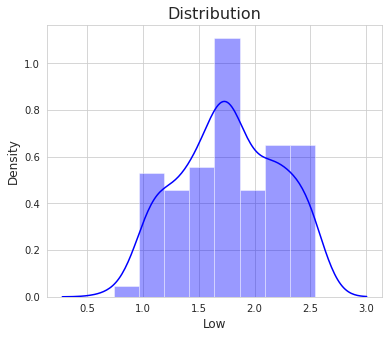

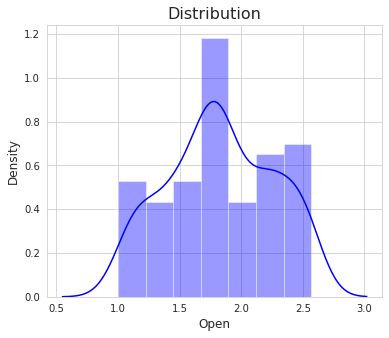

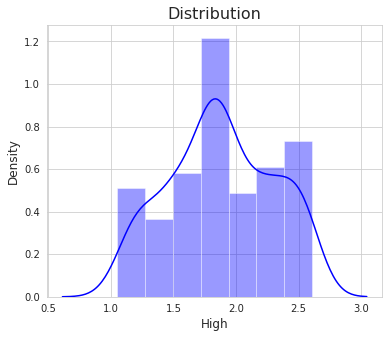

In [ ]:
# After applying the log transformation 
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(np.log10(df[col]), color='blue')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

#####1.What are the insights are found from the chart?

1] After applying the log normal disribution all the feature are normally distributed.

Text(0, 0.5, 'High price')

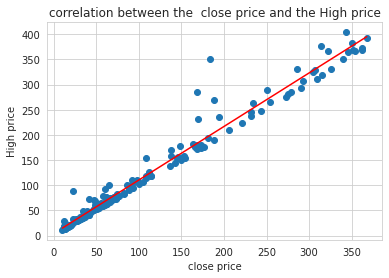

In [ ]:
# plotting the scatterplot to show how much one variable is affected by another.
plt.scatter(df['Close'], df['High'])
# This will fit the best line into the graph
plt.plot(np.unique(df['Close']), np.poly1d(np.polyfit(df['Close'], df['High'], 1))
		(np.unique(df['Close'])), color='red')
plt.title('correlation between the  close price and the High price')
plt.xlabel('close price')
plt.ylabel('High price')

Text(0, 0.5, 'low price')

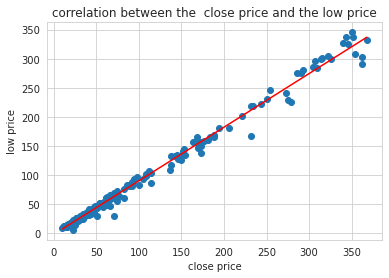

In [ ]:
# plotting the scatterplot to show how much one variable is affected by another.
plt.scatter(df['Close'], df['Low'])
# This will fit the best line into the graph
plt.plot(np.unique(df['Close']), np.poly1d(np.polyfit(df['Close'], df['Low'], 1))
		(np.unique(df['Close'])), color='red')
plt.title('correlation between the  close price and the low price')
plt.xlabel('close price')
plt.ylabel('low price')

Text(0, 0.5, 'Open price')

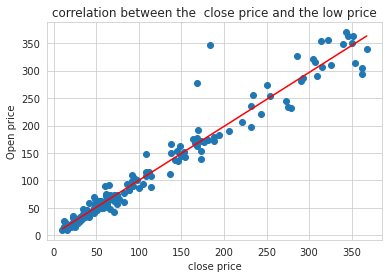

In [ ]:
# plotting the scatterplot to show how much one variable is affected by another.
plt.scatter(df['Close'], df['Open'])
# This will fit the best line into the graph
plt.plot(np.unique(df['Close']), np.poly1d(np.polyfit(df['Close'], df['Open'], 1))
		(np.unique(df['Close'])), color='red')
plt.title('correlation between the  close price and the low price')
plt.xlabel('close price')
plt.ylabel('Open price')

##### 1. why do you pick this chart?

1] In order to show the relation of features with the dependent features .

##### 2. What are insights are found from the chart?

1] From the above graph and plots we can see that the are the features have linear relation with the  dependent variable.

In [ ]:
# lets see the correlation between the features
corr = df[['High','Low','Open','Close']].corr()
corr

,High,Low,Open,Close
High,1.000000,0.983422,0.993040,0.985051
Low,0.983422,1.000000,0.983978,0.995358
Open,0.993040,0.983978,1.000000,0.977971
Close,0.985051,0.995358,0.977971,1.000000


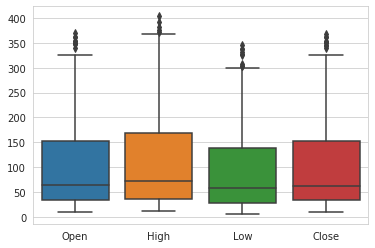

In [ ]:
# Lets plot the boxplot for the to show distributions of numeric data values
sns.boxplot(data=df, dodge=False)

###### 1. why do you pick this specific chart?

1] To show the the range of values and the distribution of  values and median  of the feature.

2. what are the insights found from the chart?

Ans: we can see that the median of the values of features are not much varied and lies around the same value.

In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


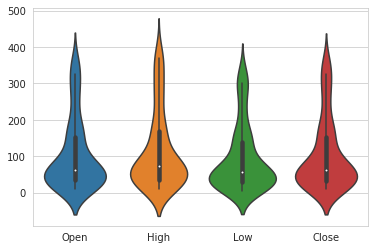

In [ ]:
# lets plot the violine plot for to visualize the distribution of numerical data
sns.violinplot(data=df)

Why we choosen this graph?

1] Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable

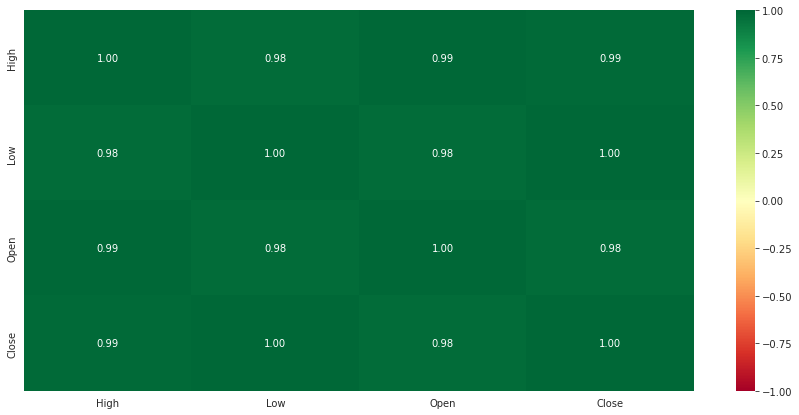

In [ ]:
# lets plot the heatmap to show the correlation between the variables .
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="RdYlGn") # Spectral
plt.show()

##### 1.Why do you choose this specific type of chart?


To show the correlation between the the variable , darker the colur higher the correlation .

#####2. what are insights are found from the chart?

All  feature values are almost correlated to each other. and amongs them 'Low' is mostly correted with the close price.

Text(0.5, 0.98, 'Pairplot of the given features')

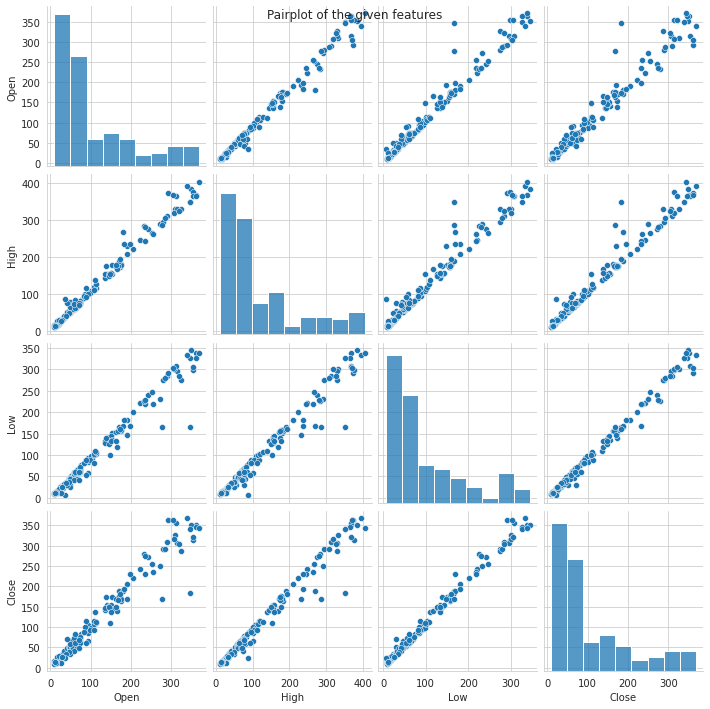

In [ ]:
# lets plot the pairplot to plot pairwise relationships between variables within a dataset. 
g = sns.pairplot(df)
g.fig.suptitle("Pairplot of the given features")

##### 1. why do you picked the  specific chart?

1]To plot pairwise relationships between variables within a dataset.

#####2. what are the insights are found from the chart?

We can see that the all the features have the linear relationship between them .

### **Insights drawn from the EDA.**



1] There no null valus present in the dataset

2] All the features have linear relation between them.

3] There sudden fall in the stock close price is seen the dataset.

4] In August 2018 the stock price has reached to its highest value.

5] We can see that the stock price are fallen to the price where it started to its inception.

##**Here , we have done our EDA and Now , let's fit the ML model on the data.**

In [ ]:
#lets check the data
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


Lets say

x= Independent variable 

y= dependent variable.

In [ ]:
x= df[['Open','Low','High']]
y= df['Close']

Data must be Normalised and applying the normalisation on x and y 

In [ ]:
'''# Data transformation
from scipy.stats import zscore
x=x.apply(zscore)
y=np.log(y)'''

'# Data transformation\nfrom scipy.stats import zscore\nx=x.apply(zscore)\ny=np.log(y)'

Split the data into Train data and test data using train_test_split

In [ ]:
# lets split the dataset into train and test data
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.20,random_state =1)

In [ ]:
# Lets rescale the all the values between  0 to 1 using the min_max_scaler
scale = MinMaxScaler()
x_train=scale.fit_transform(x_train)
x_test= scale.transform(x_test)

In [ ]:
# lets check the shape of dataset
x_train.shape

(148, 3)

In [ ]:
# check the shape of the testing dataset
x_test.shape

(37, 3)

# **Model 1.Linear Regression**

In [ ]:
# Now lets fit the data to linear regression
linear_reg= LinearRegression()
linear_reg_model= linear_reg.fit(x_train,y_train)

In [ ]:
# lets check the accuracy of train linear regression model
round(linear_reg.score(x_train,y_train),3)

0.994

In [ ]:
# lets check the accuracy of test linear regression model
round(linear_reg.score(x_test,y_test),3)

0.998

In [ ]:
# prediction of the test data
y_predicted=linear_reg.predict(x_test)
y_predicted

array([ 26.5264613 ,  30.04697913,  52.99506974,  14.74919015,
       147.01000347, 339.97588471,  47.57404618,  26.7156191 ,
        25.53891247,  51.5485512 , 167.1168406 ,  52.40492841,
        15.03278394, 317.19036116,  74.02532594,  48.98214465,
        28.10792019, 134.70037858, 106.16190122,  90.75305749,
        28.99576342,  15.52145954, 108.22518038,  58.74416284,
       165.96721099,  19.27101903,  15.01972066,  51.82026038,
        30.42231711,  62.47316615, 261.58897929, 338.47373229,
        65.29568021, 232.0096057 ,  95.84913545,  54.02351579,
       242.48451636])

**Check the evaluation metrics of the Linear Regression model** 

In [ ]:
# Performance of the linear model
print('MSE:',round(mean_squared_error(y_test,y_predicted),3))
print('RMSE:',round(math.sqrt(mean_squared_error(y_test,y_predicted)),3))
print('MAE:', round(mean_absolute_error(y_test,y_predicted),3))
print('MAPE:', round(mean_absolute_percentage_error(y_test,y_predicted),3))
print('R2:', round(r2_score(y_test,y_predicted),3))

MSE: 19.989
RMSE: 4.471
MAE: 3.053
MAPE: 0.054
R2: 0.998


Lets see how our model fits to the datset through the graph.

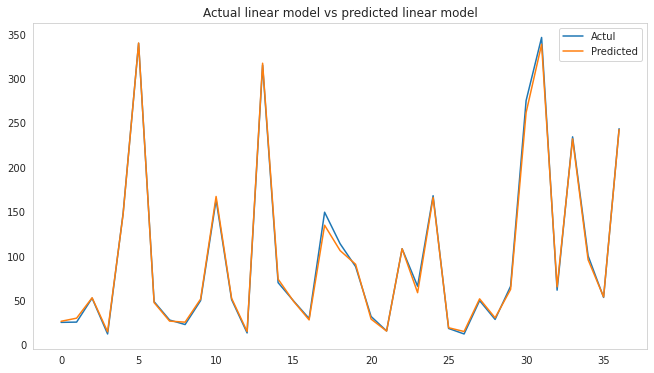

In [ ]:
plt.figure(figsize=(11,6))
plt.plot(np.array(y_test))
plt.plot(np.array(y_predicted))
plt.title('Actual linear model vs predicted linear model')
plt.legend(['Actul','Predicted'])
plt.grid()
plt.show()

#**Model 2 - Lasso Regression**

In [ ]:
# lets import the lasso regression and fit the data to lasso regression.
from sklearn.linear_model import Lasso

In [ ]:
# fit the data to lasso regression
lasso_reg=Lasso(alpha=0.05,max_iter=1000)
lasso_reg_model=lasso_reg.fit(x_train,y_train)

In [ ]:
# lets check the accuracy of lasso on train dataset
round(lasso_reg.score(x_train,y_train),4)

0.9934

In [ ]:
y_pred_lasso=lasso_reg.predict(x_test)

In [ ]:
# lets check the evaluation metrics of lasso regression
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),3))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 3))

MSE : 29.198
RMSE : 5.404
MAE : 3.673
MAPE : 0.065
R2 : 0.997


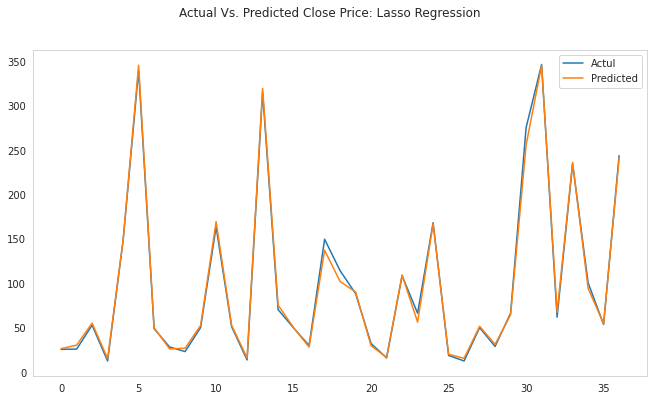

In [ ]:
# plot the graph to see the fit of model
plt.figure(figsize=(11,6))
plt.plot(np.array(y_test))
plt.plot(np.array(y_pred_lasso))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression')
plt.legend(['Actul','Predicted'])
plt.grid()
plt.show()

In [ ]:
# lets define function to calculate all the evaluation metrics
def evaluation_metrics(train,predicted):
  print("MSE :",round(mean_squared_error(train, predicted), 3))
  print("RMSE :",round(math.sqrt(mean_squared_error(train, predicted)),3))
  print("MAE :",round(mean_absolute_error(train, predicted),3))
  print("MAPE :",round(mean_absolute_percentage_error(train, predicted),3))
  print("R2 :",round(r2_score(train, predicted), 3))


In [ ]:
evaluation_metrics(y_test,y_pred_lasso)

MSE : 29.198
RMSE : 5.404
MAE : 3.673
MAPE : 0.065
R2 : 0.997


#**Model 3 - Ridge Regression**

In [ ]:
# lets fit the data to Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.01)
ridge_reg_model=ridge_reg.fit(x_train,y_train)

In [ ]:
# Check the accuracy of ridge regression on test dataset
round(ridge_reg.score(x_train,y_train),3)

0.994

In [ ]:
# check the accuracy of rideg on train dataset
y_pred_ridge=ridge_reg.predict(x_test)

In [ ]:
# check the evaluation metrics
evaluation_metrics(y_test,y_pred_ridge)

MSE : 21.201
RMSE : 4.605
MAE : 3.131
MAPE : 0.056
R2 : 0.998


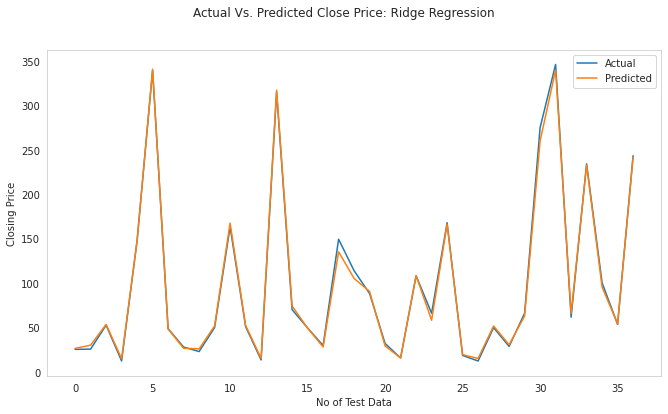

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression Plotting
plt.figure(figsize=(11,6))
plt.plot(np.array(y_test))
plt.plot(y_pred_ridge)
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression')
plt.legend(['Actual','Predicted'])
plt.xlabel('No of Test Data' )
plt.ylabel('Closing Price')
plt.grid()

#**Cross validation on Rige regression**

lets find out the best optimal hyperparameters for the Ridge regression.

In [ ]:
# cross validation and hyperparameter tunning for ridge refgression
ridge_cv=Ridge()
parameters={'alpha':[1e-15,1e-13,1e-12,1e-10,1e-7,1e-5,1e-4,1e-3,1e-1,10,20,30,40,50,60,70,80,90,100]}
ridge_model_cv=GridSearchCV(ridge_cv,parameters,scoring='neg_mean_squared_error',cv=5)

In [ ]:
# fit the model to the  training data
ridge_model_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-12, 1e-10, 1e-07, 1e-05,
                                   0.0001, 0.001, 0.1, 10, 20, 30, 40, 50, 60,
                                   70, 80, 90, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# lets print the values of best fit alpha and negative mean squared error
print('The best fit value of alpha is given by :', ridge_model_cv.best_params_['alpha'])
print('The best value of negative mean squared error is given by:',round( ridge_model_cv.best_score_,3))

The best fit value of alpha is given by : 0.001
The best value of negative mean squared error is given by: -63.241


In [ ]:
# predict the dependent variable using the ridge regression cross validation.
y_pred_ridge_cv=ridge_model_cv.predict(x_test)
y_pred_ridge_cv

array([ 26.51556085,  30.04595288,  53.04659891,  14.7554648 ,
       147.05215266, 340.08074796,  47.64416552,  26.69434114,
        25.57053221,  51.56547987, 167.16468968,  52.40211766,
        15.04266342, 317.20570217,  74.04539094,  49.00109585,
        28.10149502, 134.7562793 , 106.05107857,  90.72634438,
        29.005581  ,  15.54500684, 108.24252946,  58.67621805,
       165.97432414,  19.28182688,  15.02651101,  51.80360735,
        30.43342611,  62.52220894, 261.42444088, 338.62675226,
        65.34483905, 232.1138318 ,  95.79986757,  54.02405232,
       242.4073673 ])

In [ ]:
# checking the evaluation metrics on the training dataset of the ridge regression cv
y_train_pred_ridge_cv=ridge_model_cv.predict(x_train)
y_train_pred_ridge_cv

array([ 57.41924845,  54.42081157, 166.30661399, 352.33158211,
       167.88231035,  28.85535248,  15.38547425, 198.29708268,
       142.80814842,  99.72113962,  54.42049365, 106.02869411,
       142.52753494, 179.7330677 , 221.40121994, 140.49022011,
        73.66754182, 169.25961439,  13.47239458,  46.24409546,
        10.59976203, 104.58210544,  31.99650944,  45.30593809,
        32.81308538,  67.05772018,  37.08116092, 346.82704669,
        68.8654313 ,  16.41368441, 153.18904523, 177.34935142,
       107.73397397, 107.92595119,  65.80410349, 146.36443777,
        19.06553542, 166.82931628, 179.8065154 ,  15.61935069,
       195.72037437,  26.55134316, 314.1389518 ,  44.57859468,
       322.57257426,  95.11450154, 118.39806846,  15.20915935,
        93.6036117 , 174.71515654,  56.90188257,  31.08113915,
        14.36723626,  14.88658741,  58.01215776,  69.83321177,
       261.77977659,  17.28710756,  63.22255323,  13.65134048,
       300.27399485,  52.03717225,  62.16362432,  48.82

In [ ]:
# evaluation metrics of training dataset.
evaluation_metrics(y_train,y_train_pred_ridge_cv)

MSE : 54.699
RMSE : 7.396
MAE : 4.475
MAPE : 0.059
R2 : 0.994


In [ ]:
# lets find the evaluation metrics for the ridge regression
evaluation_metrics(y_test,y_pred_ridge_cv)

MSE : 20.095
RMSE : 4.483
MAE : 3.061
MAPE : 0.054
R2 : 0.998


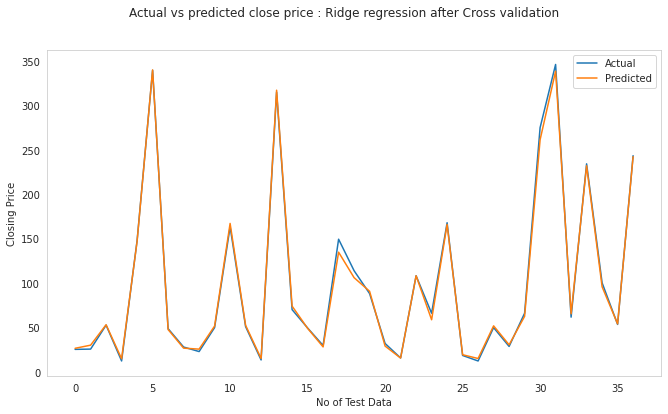

In [ ]:
# Plotting the graph to show fit of the ridge regression with cross validation
plt.figure(figsize=(11,6))
plt.plot(np.array(y_test))
plt.plot(np.array(y_pred_ridge_cv))
plt.suptitle('Actual vs predicted close price : Ridge regression after Cross validation')
plt.legend(['Actual','Predicted'])
plt.xlabel('No of Test Data')
plt.ylabel('Closing Price')
plt.grid()

#**Model 4 -Elastic net Regression**

In [ ]:
# import the elastic net regression
from sklearn.linear_model import ElasticNet
# fit the data to elastic regression

elastic=ElasticNet(alpha=0.01,l1_ratio=0.5)
elastic_model=elastic.fit(x_train,y_train)

In [ ]:
# lets check the accuracy of elastic net regression
round(elastic.score(x_train,y_train),3)

0.983

In [ ]:
# Predicting the independet variable
y_predict_elastic=elastic.predict(x_test)
y_predict_elastic

array([ 26.80169988,  30.86070752,  58.81267463,  17.08958914,
       153.24535253, 336.39396482,  57.52616241,  26.70700054,
        30.16376465,  53.75639618, 168.5919238 ,  51.47640371,
        16.51356443, 306.02460962,  74.38982225,  51.17826544,
        28.90329282, 138.32031022,  98.10659979,  87.55447599,
        31.2323548 ,  19.0234726 , 107.92474934,  54.9724703 ,
       162.44718603,  20.82514909,  17.45573075,  50.58714131,
        32.16391106,  67.03968394, 244.73871065, 342.58129035,
        70.51427456, 238.73550515,  91.24888934,  53.7856195 ,
       228.842637  ])

In [ ]:
# checking elastic model on the trainig dataset 
y_train_predict_elastic=elastic.predict(x_train)
evaluation_metrics(y_train,y_train_predict_elastic)

MSE : 161.232
RMSE : 12.698
MAE : 7.292
MAPE : 0.099
R2 : 0.983


In [ ]:
# check the evaluation metrics of the elastic net model
evaluation_metrics(y_test,y_predict_elastic)

MSE : 62.967
RMSE : 7.935
MAE : 5.54
MAPE : 0.1
R2 : 0.993


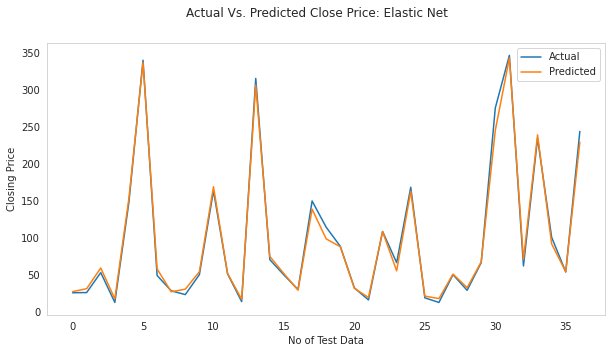

In [ ]:
# plotting the actual close price vs predicted close price using elastic net regression
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot(y_predict_elastic)
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net')
plt.legend(['Actual','Predicted'])
plt.xlabel('No of Test Data')
plt.ylabel('Closing Price')
plt.grid()

#**Elastic net regression using cross validation**

In [ ]:
# Applying the grid search cv to the elastic regression
elastic_cv=ElasticNet()
parameters={'alpha':[1e-15,1e-14,1e-12,1e-10,1e-8,1e-6,1e-4,1e-2,1e-1,10,20,30,40,50,60,70,80,90,100],
            'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3]}
elastic_model_cv=GridSearchCV(elastic_cv,parameters,scoring="neg_mean_squared_error",cv=5)

In [ ]:
# fitting the model to the train dataset
elastic_model_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-14, 1e-12, 1e-10, 1e-08, 1e-06,
                                   0.0001, 0.01, 0.1, 10, 20, 30, 40, 50, 60,
                                   70, 80, 90, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1, 2, 3]},
             scoring='neg_mean_squared_error')

In [ ]:
# lets check the best parameters
elastic_model_cv.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.3}

In [ ]:
# lets check the score of elastic net regression with cv
elastic_model_cv.best_score_

-62.328159221285105

In [ ]:
# lets print this 
print("The best fit alpha value is for elastic net regression is :" ,elastic_model_cv.best_params_['alpha'],)
print('The best fit l1_ration is for elastic net regression is :', elastic_model_cv.best_params_['l1_ratio'])   

The best fit alpha value is for elastic net regression is : 0.0001
The best fit l1_ration is for elastic net regression is : 0.3


In [ ]:
# apply the elastic net regression with cross validation on on the test dataset
y_train_pred_elastic_cv=elastic_model_cv.predict(x_train)
y_pred_elastic_with_cv=elastic_model_cv.predict(x_test)

In [ ]:
# check the evaluation metrics on train dataset
evaluation_metrics(y_train,y_train_pred_elastic_cv)

MSE : 55.403
RMSE : 7.443
MAE : 4.509
MAPE : 0.059
R2 : 0.994


In [ ]:
# check the evaluation metrics on test dataset
evaluation_metrics(y_test,y_pred_elastic_with_cv)

MSE : 21.253
RMSE : 4.61
MAE : 3.134
MAPE : 0.056
R2 : 0.998


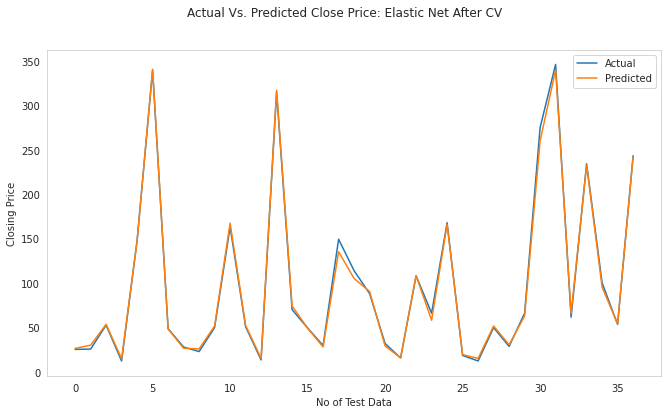

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting 
plt.figure(figsize=(11,6))
plt.plot(np.array(y_test))
plt.plot(y_pred_elastic_with_cv)
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV')
plt.legend(['Actual','Predicted'])
plt.xlabel('No of Test Data')
plt.ylabel('Closing Price')
plt.grid()

#**Model-5 Decision tree regression**

In [ ]:
#import packages
from sklearn.tree import DecisionTreeRegressor

#implement model
DT_model = DecisionTreeRegressor()
DT_model.fit(x_train,y_train)
DT_model.score(x_test,y_test)
#fit the model
test_pred_DT = DT_model.predict(x_test)
train_pred = DT_model.predict(x_train)

# test model on train data set
print('Train set evaluation:\n_____________________________________')
evaluation_metrics(y_train, train_pred)


# test model on test data set

print('Test set evaluation:\n_____________________________________')
evaluation_metrics(y_test, test_pred_DT)


Train set evaluation:
_____________________________________
MSE : 0.0
RMSE : 0.0
MAE : 0.0
MAPE : 0.0
R2 : 1.0
Test set evaluation:
_____________________________________
MSE : 54.69
RMSE : 7.395
MAE : 5.006
MAPE : 0.07
R2 : 0.994


In [ ]:
DT_model.score(x_train,y_train)

1.0

In [ ]:
DT_model.score(x_test,y_test)

0.9940934937763716

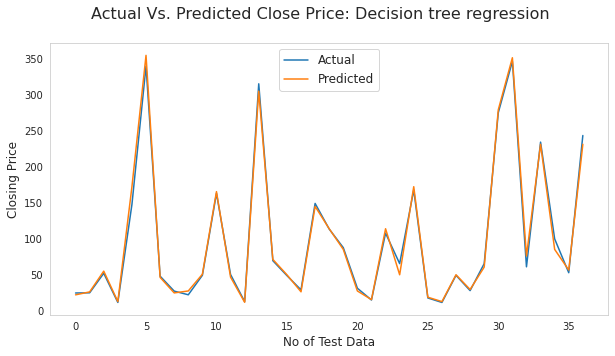

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot(test_pred_DT)
plt.suptitle('Actual Vs. Predicted Close Price: Decision tree regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

#**Cross validation and hyper parameter tunning on the Decsion tree**

We got 100% score on training data.

On test data we got 0.994 score because we did not provide any tuning parameters while intializing the tree as a result of which algorithm split the training data till the leaf node. Due to which depth of tree increased and our model did the overfitting.

That's why we are getting high score on our training data and less score on test data.

So to solve this problem we would use hyper parameter tuning.

We can use GridSearch or RandomizedSearch for hyper parameters tuning.

In [ ]:
# lets define the parameters for the decision tree
param_grid={"criterion": ["mse", "mae"],
              "min_samples_split": list(np.arange(1,50,3)),
              "max_depth": list(np.arange(1,10)),
              "min_samples_leaf": list(np.arange(1,10)),
              "max_leaf_nodes": list(np.arange(1,8)),
              }

In [ ]:
# Hyperparameter tunning on decision tree regression
Decison_tree=DecisionTreeRegressor()
Decison_tree_cv=GridSearchCV(Decison_tree,param_grid,cv=5)
# fitting of data
Decison_tree_cv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 4, 7, 10, 13, 16, 19, 22, 25,
                                               28, 31, 34, 37, 40, 43, 46,
                                               49]})

In [ ]:
Decison_tree_cv.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 7}

**After applying the best hyeperparameters on Decision tree regression**

In [ ]:
# Decison Tree Regressor model trainning on best parameters got from GridsearchCV hyperparameter tuning.
Decision_tree_tuned = DecisionTreeRegressor(criterion = 'mse',
                                            max_depth = 8, 
                                            max_leaf_nodes=7,
                                            min_samples_leaf = 5,
                                            min_samples_split=7) 
# fiiting the dataset
Decision_tree_tuned.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_leaf_nodes=7,
                      min_samples_leaf=5, min_samples_split=7)

In [ ]:
# Trainning Score on Decision Tree Regressor with best parameters tunning
Decision_tree_tuned.score(x_train, y_train)

0.9823691969565722

In [ ]:
# lets try on the test dataset
y_tuned_pred=Decision_tree_tuned.predict(x_test)
evaluation_metrics(y_test,y_tuned_pred)

MSE : 290.09
RMSE : 17.032
MAE : 11.861
MAPE : 0.199
R2 : 0.969


#**Model-6 Random forest Regressor**

In [ ]:
# Using random forest
random_forest=RandomForestRegressor()
# fitting the data
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
# check the score of the data
random_forest.score(x_train,y_train)

0.9979307731415916

#**Random Forest Regreesor with cross validation and hyper parameter tunning**

In [ ]:
#Hyper parameter tunning for the random forest
random_forest=RandomForestRegressor()
# define the parameter range for the random forest
param_grid={'n_estimators': np.arange(50,100),
            'max_features':['auto','sqrt','log2'],
            "min_samples_split": [1, 3, 10],
            'bootstrap':[True,False] }

# Apply the hyperparameter tunning using the grid search cv
random_forest_gridsearch=GridSearchCV(random_forest ,param_grid ,n_jobs=-1 ,cv=5)
random_forest_gridsearch.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 3, 10],
                         'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:
random_forest_gridsearch.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 65}

#**Random Forest using the cross validation and hyperparameter tunning**

In [ ]:
# After giving the best parameteres 
random_forest_with_bestpara=RandomForestRegressor(bootstrap = 'True',
                                                  max_features='auto',
                                                  max_leaf_nodes=5,
                                                  min_samples_leaf = 3,
                                                  n_estimators=65) 
# best fitting of the parameters
random_forest_with_bestpara.fit(x_train, y_train)

RandomForestRegressor(bootstrap='True', max_leaf_nodes=5, min_samples_leaf=3,
                      n_estimators=65)

In [ ]:
# checking the accuracy after the tunning and cross validation
# on the training dataset
random_forest_with_bestpara.score(x_train,y_train)

0.9859938762843737

In [ ]:
# checking the accuracy after the tunning and cross validation
# on the testing  dataset
random_forest_with_bestpara.score(x_test,y_test)

0.9896102870886895

#**Model0-7 XGBoost Regression**

In [ ]:
# implement the XGBoost model
xgb_regressor=XGBRegressor()
xgb_regressor.fit(x_train,y_train)

[17:45:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# predict the  dependent variable 
# on training data
y_pred_train_xgb=xgb_regressor.predict(x_train)
y_pred_test_xgb=xgb_regressor.predict(x_test)

In [ ]:
# find the r2score on train and test data
r2_score_train=r2_score(y_train,y_pred_train_xgb)
r2_score_test=r2_score(y_test,y_pred_test_xgb)

In [ ]:
print("r2_score_train :",r2_score_train)

print("r2_score_test :",r2_score_test)

r2_score_train : 0.9994938413318265
r2_score_test : 0.9955767212749966


In [ ]:
# xgboost regression evaluation metrics on trainig dataset
evaluation_metrics(y_train,y_pred_train_xgb)

MSE : 4.939
RMSE : 2.222
MAE : 1.575
MAPE : 0.026
R2 : 0.999


In [ ]:
# xgboost regression evaluation metrics on testing dataset
evaluation_metrics(y_test,y_pred_test_xgb)

MSE : 40.957
RMSE : 6.4
MAE : 4.54
MAPE : 0.071
R2 : 0.996


#**Evaluation Metrics of all models**

In [ ]:
# Creating the function for the comapring model
def compare_model(x_train,x_test,y_train,y_test,models):
  df_columns=[]
  # creating the dataframe for the storing the metrics
  df=pd.DataFrame(columns=df_columns)
  i=0
  # need to pass each model one by one
  for model in models:
    # fitting the model on training dataset
    model.fit(x_train,y_train)
    # predicting the y values for model
    y_pred=model.predict(x_test)
    # checking the accuracy of the model
    accuracy=model.score(x_test,y_test)

    # getting the evaluation metrics of the model
    MSE=round(mean_squared_error(y_test,y_pred),3)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),3)
    MAE=round(mean_absolute_error(y_test,y_pred),3)
    MAPE=round(mean_absolute_percentage_error(y_test,y_pred),3)
    R2 = round(r2_score(y_test, y_pred), 3)

    # getting the above in the dataframe
    df.loc[i,'Model']= model.__class__.__name__
    df.loc[i,'MSE']=MSE
    df.loc[i,'RMSE']=RMSE
    df.loc[i,'MAE']=MAE
    df.loc[i,'MAPE']=MAPE
    df.loc[i,'R2']=R2
    # to get values in next row and next columns
    i=i+1
  # sorting the all values by the r2 score
  df.sort_values(by=['R2'],ascending=False,inplace=True,ignore_index=True)

  return df


In [ ]:
all_ML_model=[linear_reg,lasso_reg,ridge_reg,ridge_cv,elastic,
              DT_model,Decision_tree_tuned,random_forest,random_forest_with_bestpara,
              xgb_regressor]

In [ ]:
# metrics evaluation parameter
metrics_comparison_df = compare_model(x_train, x_test, y_train, y_test, all_ML_model)
metrics_comparison_df

[17:46:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model,MSE,RMSE,MAE,MAPE,R2
0,LinearRegression,19.989,4.471,3.053,0.054,0.998
1,Ridge,21.201,4.605,3.131,0.056,0.998
2,Lasso,29.198,5.404,3.673,0.065,0.997
3,RandomForestRegressor,32.406,5.693,3.915,0.064,0.997
4,XGBRegressor,40.957,6.400,4.540,0.071,0.996
5,DecisionTreeRegressor,51.576,7.182,4.795,0.068,0.994
6,ElasticNet,62.967,7.935,5.540,0.100,0.993
7,Ridge,71.353,8.447,5.998,0.110,0.992
8,RandomForestRegressor,92.235,9.604,7.587,0.179,0.990
9,DecisionTreeRegressor,290.090,17.032,11.861,0.199,0.969


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

1] Firstly and most important to do regular audit in the bank.The auditing team must be independent and able to do investigation without any compramise.

2]Involvement of the bank's senior person in the fraud , has damaged the position of bank in the market and its overall reputation , so make sure to put certain steps in the increse reputation of bank and customer have longer relation with bank.

3] Bank should recover their losses through legal process and make sure have a such incident will not happen again.


# **Conclusion**

1] From the given data , which have less no po data points and few columns all the given features have linear relation between them.

2] We found data has no missing values and less no of outliers since data is small , we might have loss data.

3] We have seen that stock price was in continous rise upto 2018 and it went to its initial price after the news suddenly break  in india.

4] News afftected lot of market value of bank and loss of stock price in the market.

5] We want to predict the stock price of the yes bank , after applying lot of ML models we found that most of the model offer highest accuracy such as linear regression,lasso,ridge regression ,XGboost .

6] Amongst all the model we have applied , elastic net regression has the lowest accuracy .

7] From the above linear regression, lasso, ridge  we are able to predict the close stock price with the 99%  accuracy.